## Word Cloud Generation of Hash Tags


### Import Relevant Packages

In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import re
from twython import Twython
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im
from nltk.corpus import stopwords
import matplotlib.pyplot as plt  
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
import preprocessor as p
from operator import itemgetter
import gensim
from sklearn.feature_extraction.text import CountVectorizer
from gensim.parsing.porter import PorterStemmer
import string
from matplotlib import rcParams
from nltk import WordNetLemmatizer
from nltk import pos_tag, sent_tokenize, word_tokenize, BigramAssocMeasures,\
    BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder
from subprocess import check_output
st = PorterStemmer()
WNL = nltk.WordNetLemmatizer()

### Reading the Datasource

In [2]:
df_all=pd.read_csv("combined_data_classified(non_advert).csv")
#df3=df_all[df_all['week_num']==1] # Selecting any particular week
df=df_all
df.head()

,week_num,day_num,row_num,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,tweet_cursor_id,sentiment,topic,advert_label
0,1,1,3,1.250210e+18,healthadding,"i am affiliate marketing, copy writing",NaN,1129,227,762,14/4/2020 23:48,24/5/2020 23:56,0,Surprising ! Real job\nhttps://t.co/5079HFQq5x...,"[{'text': 'WorkFromHome', 'indices': [46, 59]}]",1.264710e+18,"['surprising', 'real', 'job']","['surprising', 'real', 'job']",non-advert
1,1,1,5,4.347212e+09,parkhurstheidi,Iowa Market President at Bank of America. Resi...,"Coal Valley, IL",1844,710,3156,24/11/2015 17:38,24/5/2020 23:56,0,This article brought a smile to my face! Great...,"[{'text': 'WFH', 'indices': [155, 159]}]",1.264710e+18,"['this', 'article', 'brought', 'a', 'smile', '...","['article', 'brought', 'smile', 'face', 'great...",non-advert
2,1,1,12,2.634033e+07,DaisyHuntly,"Journalist, digi specialist, based @dailyadver...","Wagga Wagga, New South Wales",1531,1192,6748,24/3/2009 22:21,24/5/2020 23:49,0,Ok I think it’s time I got on the ladder and p...,"[{'text': 'wfh', 'indices': [174, 178]}]",1.264710e+18,"['ok', 'i', 'think', 'its', 'time', 'i', 'got'...","['ok', 'think', 'got', 'ladder', 'put', 'repla...",non-advert
3,1,1,20,2.621717e+09,ThatBIMGuy,NaN,"Denver, CO",173,157,642,19/6/2014 2:16,24/5/2020 23:39,0,Check out my new #WorkFromHome setup! Gonna be...,"[{'text': 'WorkFromHome', 'indices': [17, 30]}]",1.264700e+18,"['check', 'out', 'my', 'new', 'setup', 'gonna'...","['check', 'new', 'setup', 'gonna', 'till', 'le...",non-advert
4,1,1,21,3.932192e+09,CSHL_WISE,@CSHL’s Women in Science /trainee lead since 2...,"Cold Spring Harbor, NY",1364,2260,10667,12/10/2015 0:08,24/5/2020 23:39,0,(1/3) If you’re starting to feel some level of...,"[{'text': 'VirtualMeetings', 'indices': [154, ...",1.264700e+18,"['if', 'youre', 'starting', 'to', 'feel', 'som...","['starting', 'feel', 'level', 'zoom', 'fatigue...",non-advert


### Selecting Hashtags

In [3]:
df['hashtag'] = df['text'].apply(lambda x: re.findall(r"#(\w+)", x)) # Selecting Hashtags in New Column 
df

/Users/shreyanshshivam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,week_num,day_num,row_num,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,tweet_cursor_id,sentiment,topic,advert_label,hashtag
0,1,1,3,1.250210e+18,healthadding,"i am affiliate marketing, copy writing",NaN,1129,227,762,14/4/2020 23:48,24/5/2020 23:56,0,Surprising ! Real job\nhttps://t.co/5079HFQq5x...,"[{'text': 'WorkFromHome', 'indices': [46, 59]}]",1.264710e+18,"['surprising', 'real', 'job']","['surprising', 'real', 'job']",non-advert,[WorkFromHome]
1,1,1,5,4.347212e+09,parkhurstheidi,Iowa Market President at Bank of America. Resi...,"Coal Valley, IL",1844,710,3156,24/11/2015 17:38,24/5/2020 23:56,0,This article brought a smile to my face! Great...,"[{'text': 'WFH', 'indices': [155, 159]}]",1.264710e+18,"['this', 'article', 'brought', 'a', 'smile', '...","['article', 'brought', 'smile', 'face', 'great...",non-advert,[WFH]
2,1,1,12,2.634033e+07,DaisyHuntly,"Journalist, digi specialist, based @dailyadver...","Wagga Wagga, New South Wales",1531,1192,6748,24/3/2009 22:21,24/5/2020 23:49,0,Ok I think it’s time I got on the ladder and p...,"[{'text': 'wfh', 'indices': [174, 178]}]",1.264710e+18,"['ok', 'i', 'think', 'its', 'time', 'i', 'got'...","['ok', 'think', 'got', 'ladder', 'put', 'repla...",non-advert,[wfh]
3,1,1,20,2.621717e+09,ThatBIMGuy,NaN,"Denver, CO",173,157,642,19/6/2014 2:16,24/5/2020 23:39,0,Check out my new #WorkFromHome setup! Gonna be...,"[{'text': 'WorkFromHome', 'indices': [17, 30]}]",1.264700e+18,"['check', 'out', 'my', 'new', 'setup', 'gonna'...","['check', 'new', 'setup', 'gonna', 'till', 'le...",non-advert,[WorkFromHome]
4,1,1,21,3.932192e+09,CSHL_WISE,@CSHL’s Women in Science /trainee lead since 2...,"Cold Spring Harbor, NY",1364,2260,10667,12/10/2015 0:08,24/5/2020 23:39,0,(1/3) If you’re starting to feel some level of...,"[{'text': 'VirtualMeetings', 'indices': [154, ...",1.264700e+18,"['if', 'youre', 'starting', 'to', 'feel', 'som...","['starting', 'feel', 'level', 'zoom', 'fatigue...",non-advert,"[24, VirtualMeetings, Zoom, Virtual, ZoomFatig..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23242,1,3,5604,1.230000e+18,ThePreamble2,ðŸ‡µðŸ‡­| U B E C | Spontaneous | Dreamer | Op...,"Cebu City, Central Visayas",53,9,216,16/2/2020 17:12,26/5/2020 17:23,0,Day 60: working from home ðŸ¡ðŸŽ§\n\n#wfh #wo...,"[{'text': 'wfh', 'indices': [30, 34]}, {'text'...",1.270000e+18,"['day', 'working', 'from', 'home']",[],non-advert,"[wfh, workingfromhome, ecq, covid_19, covid19,..."
23244,1,6,18012,6.064514e+07,deba1602,Part of the flock known as Indian software eng...,"Bhubaneswar, Odisha, India",244,5599,28041,27/7/2009 16:47,29/5/2020 17:15,1,"A while ago, wrapped up my 11th week of #WorkF...","[{'text': 'WorkFromHome', 'indices': [40, 53]}...",1.270000e+18,"['a', 'while', 'ago', 'wrapped', 'up', 'my', '...","['ago', 'wrapped', 'nothing', 'remarkable', 'l...",non-advert,"[WorkFromHome, CoronaVirusIndia]"
23253,1,6,17111,3.687167e+08,AlexNSanDiego,Emmy Award-winning reporter. Web producer for ...,"San Diego, CA",679,778,7586,6/9/2011 3:15,29/5/2020 22:26,0,Could someone explain why is it that whenever ...,"[{'text': 'wfh', 'indices': [199, 203]}, {'tex...",1.270000e+18,"['could', 'someone', 'explain', 'why', 'is', '...","['could', 'someone', 'explain', 'whenever', 'r...",non-advert,"[wfh, journosproblems]"
23256,1,5,16797,2.620095e+09,dsylynkurokawa,#fujoshi #modaozushi header pic credits to @to...,yaoi land,390,69,4122,12/7/2014 1:39,28/5/2020 1:34,0,Goodmorning. ðŸ˜´\n\n#WorkFromHome https://t.c...,"[{'text': 'WorkFromHome', 'indices': [16, 29]}]",1.270000e+18,['goodmorning'],['goodmorning'],non-advert,[WorkFromHome]


### Basic Text Cleaning

In [4]:
def clean(x):
 x = re.sub(r'^RT[\s]+', '',x)
 x = re.sub(r'https?:\/\/.*[\r\n]*', '', x)
 x = re.sub(r'#', '', x)
 x = re.sub(r'@[A-Za-z0–9]+', ' ', x) 
 return x
df['hashtag'] = df['text'].apply(clean)

/Users/shreyanshshivam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


### Defining the Stopwords

In [5]:
comment_words = '' 
stopwords = nltk.corpus.stopwords.words('english')
stopwords += ['wfh','lockdown','remotework','remoteworking','day','workingfromhome','wfhlife','workathome', 'coronaviru','coronavirus','covid_','covid','text','indices','work','home','amp','workfromhome','WFH','working','wfh ','from','LoveWhereverYouWork','MyHomeOffice','AnotherDayAtTheHomeOffice','HomeSweetOffice','SigningOnFromHome','MyWFHRoutine','SigningOnInSweatpants','LetsWorkFromHome','WorkFromWherever','WhenYouWorkFromHome']


### Text Preprocessing

In [6]:
all_tweets1=[]
all_tweets2=[]
all_tweets3=[]
all_tweets4=[] #no stemming and stopwords
all_tweets5=[] # remove stopwords
all_tweets6=[] #lemmitised instead of stemming.. seems better

lemmatizer = nltk.stem.WordNetLemmatizer()

for row in df["hashtags"]:
    
    # remove all urls,mentions, hashtags using twitter preprocessing p
    tweets1 = p.clean(row)
    all_tweets1.append(tweets1)

    #remove digits,punctuations
   
    tweets2=re.sub(r"\b\d+\b","",tweets1)
    all_tweets2.append(tweets2)
    
    
    #tokenise 
    tweets3=list(gensim.utils.tokenize(tweets2))
    all_tweets3.append(tweets3)
    
    #convert to lower case

    tweets4 = [word.lower() for word in tweets3]
    all_tweets4.append(tweets4)
    
    
    #remove stopwords
    tweets5= [word for word in tweets4 if word not in stopwords]
    all_tweets5.append(tweets5)
    
    
    #lemmitise
    tweets6 = [lemmatizer.lemmatize(word) for word in tweets5]
    comment_words += " ".join(tweets6)+" "

### Generating Word Cloud of the Processed Text

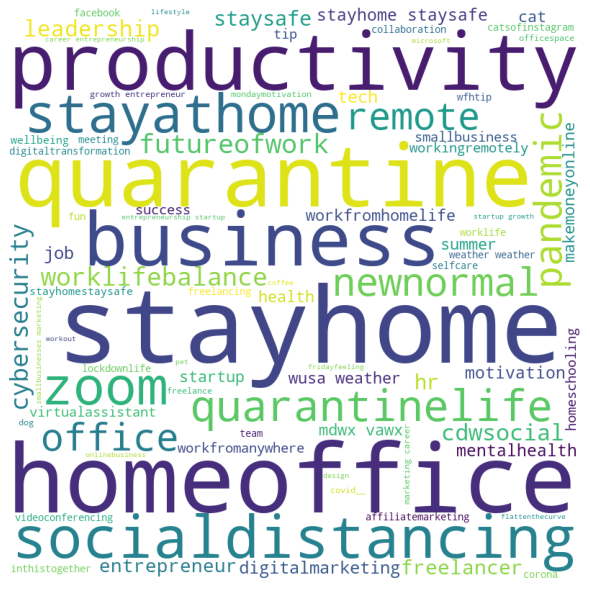

In [7]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 